In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.transform import Rotation as R

In [5]:
def change_frame(reference_array,transform_array):
    outv = []
    for i in range(len(reference_array)):
        azi,pitch,roll = reference_array[i]
        v = transform_array[i]
        r = R.from_euler('zxy', [azi,pitch,roll], degrees=True)
        outv.append(r.inv().apply(v))
    return np.asarray(outv)

In [6]:
df = pd.read_csv('Test_Data.csv')
df

,time,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,...,By,Bz,Azimuth,Pitch,Roll,Gain,Latitude,Longitude,Speed (m/s),Unnamed: 20
0,0.051,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,27.95,-43.87,0.0000,0.0000,0.000,-∞,0.000000,0.000000,0.00,NaN
1,0.075,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,29.12,-44.18,0.0000,0.0000,0.000,-∞,42.381375,-71.117313,0.41,NaN
2,0.085,-0.0664,0.0097,0.9980,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,29.12,-44.18,0.0000,0.0000,0.000,-∞,42.381375,-71.117313,0.41,NaN
3,0.087,-0.0664,0.0097,0.9980,0.0000,0.0000,0.0000,-0.0038,0.0085,0.0030,...,29.12,-44.18,0.0000,0.0000,0.000,-∞,42.381375,-71.117313,0.41,NaN
4,0.095,-0.0664,0.0097,0.9980,0.0000,0.0000,0.0000,-0.0038,0.0085,0.0030,...,28.95,-43.26,0.0000,0.0000,0.000,-∞,42.381375,-71.117313,0.41,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14474,73.406,-0.1961,0.0245,0.9787,0.0664,0.1042,0.0495,-0.0869,-0.1588,-0.0263,...,29.50,-50.70,335.2133,-1.0368,-12.566,64.2160,42.381419,-71.117539,0.00,NaN
14475,73.408,-0.1961,0.0245,0.9787,0.2118,0.0630,0.0209,-0.0869,-0.1588,-0.0263,...,29.50,-50.70,335.2133,-1.0368,-12.566,64.2160,42.381419,-71.117539,0.00,NaN
14476,73.408,-0.1961,0.0245,0.9787,0.2118,0.0630,0.0209,-0.0545,-0.1106,-0.0178,...,29.50,-50.70,335.2133,-1.0368,-12.566,64.2160,42.381419,-71.117539,0.00,NaN
14477,73.417,-0.1961,0.0245,0.9787,0.2118,0.0630,0.0209,-0.0173,-0.0397,-0.0129,...,29.50,-50.70,335.2133,-1.0368,-12.566,64.2160,42.381419,-71.117539,0.00,NaN


#### Start by viziualizing the g-force over time through each of the phone's axes.  In my case the positive $\hat{z}$ direction points through the phone screen away from the user. It begins pointed towards the ground. 

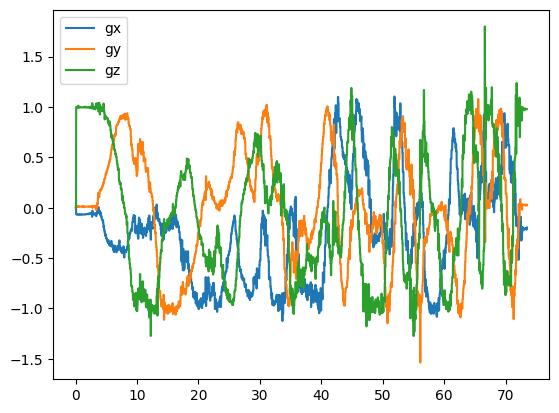

In [8]:
plt.plot(df['time'],df['gFx'],label='gx')
plt.plot(df['time'],df['gFy'],label='gy')
plt.plot(df['time'],df['gFz'],label='gz')
plt.legend()

### As the phone moves, the direction of gravity and orientation changes. We'll use the Azimuth, Pitch and Roll angles to switch to a nonrotating frame. 

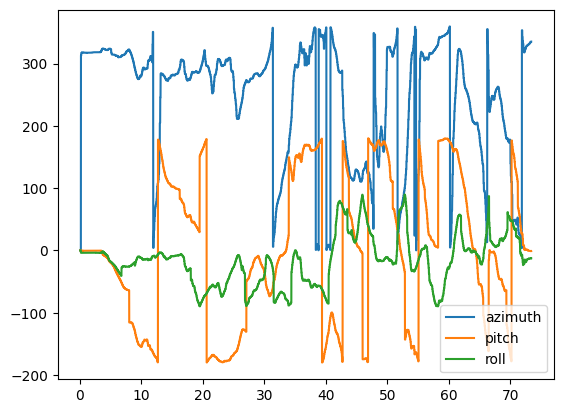

In [9]:
plt.plot(df['time'],df['Azimuth'],label='azimuth')
plt.plot(df['time'],df['Pitch'],label='pitch')
plt.plot(df['time'],df['Roll'],label='roll')
plt.legend()

In [10]:
#package into arrays
reference = df[['Azimuth','Pitch','Roll']].values
gforce = df[['gFx','gFy','gFz']].values

In [12]:
#compute de-rotated acclerations
x_gforce = change_frame(reference,gforce)

Text(0.5, 1.0, 'Output')

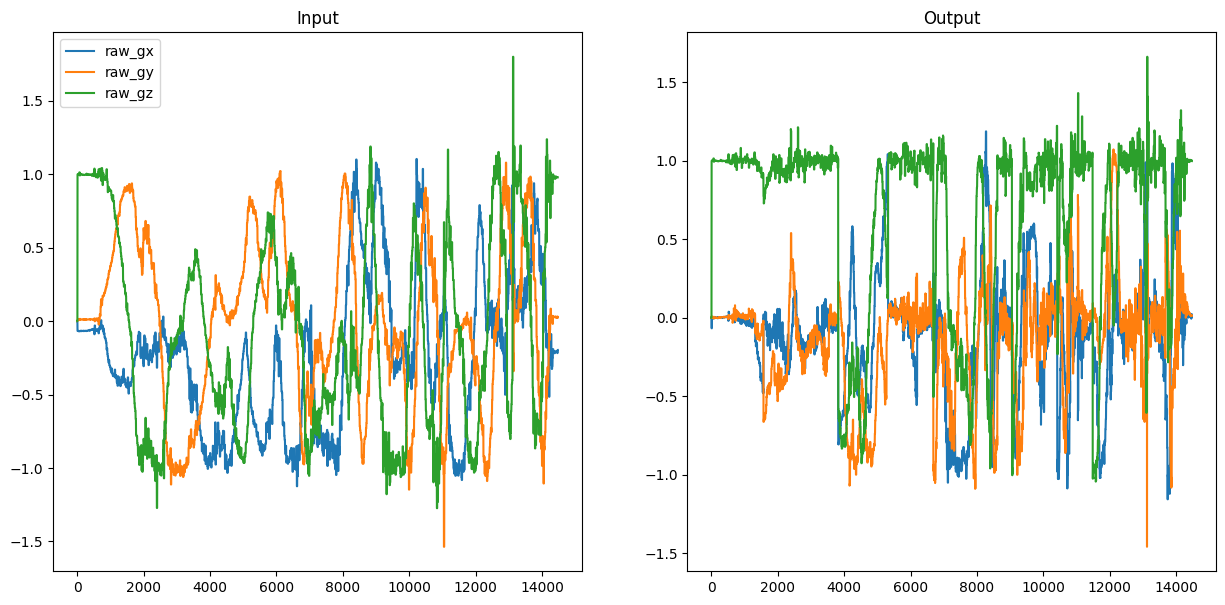

In [18]:
fig,ax = plt.subplots(ncols=2,figsize=(15,7))
ax[0].plot(gforce,label=['raw_gx','raw_gy','raw_gz'])
ax[0].set_title("Input")
ax[0].legend()
ax[1].plot(x_gforce,label=['rot_gx','rot_gy','rot_gz'])
ax[1].set_title("Output")

#### We can see now we've transformed from the phone frame to a rest frame where positive $\hat{z}$ direction is instead alighed with the ground regardless of the position of the phone. We can now analyze the acclerations in isolation.